In [129]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [130]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [131]:
# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(28, activation='relu'),
    Dropout(0.2),
    Dense(14, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [132]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [133]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6891 - accuracy: 0.7841 - val_loss: 0.3522 - val_accuracy: 0.9051
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5432 - accuracy: 0.8418 - val_loss: 0.2704 - val_accuracy: 0.9233
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5179 - accuracy: 0.8494 - val_loss: 0.2642 - val_accuracy: 0.9283
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5047 - accuracy: 0.8538 - val_loss: 0.2843 - val_accuracy: 0.9268
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4962 - accuracy: 0.8578 - val_loss: 0.2719 - val_accuracy: 0.9273
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4729 - accuracy: 0.8648 - val_loss: 0.2673 - val_accuracy: 0.9302
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4731 - accuracy: 0.8630 - val_loss: 0.2662 - val_accuracy:

In [134]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.2543 - accuracy: 0.9356 - 790ms/epoch - 3ms/step


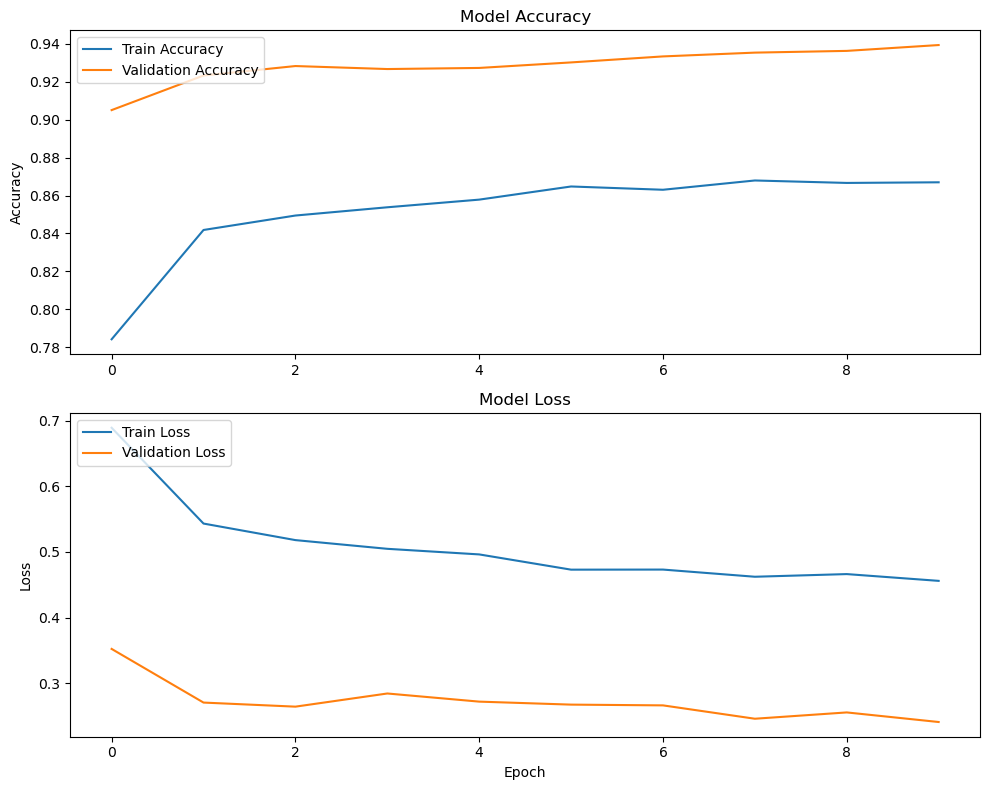

In [135]:
# Visualize the training results
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot training & validation accuracy values
axs[0].plot(history.history['accuracy'], label='Train Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Model Accuracy')
axs[0].legend(loc='upper left')

# Plot training & validation loss values
axs[1].plot(history.history['loss'], label='Train Loss')
axs[1].plot(history.history['val_loss'], label='Validation Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_title('Model Loss')
axs[1].legend(loc='upper left')


plt.tight_layout()
plt.show()

In [136]:
# Make predictions
predictions = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


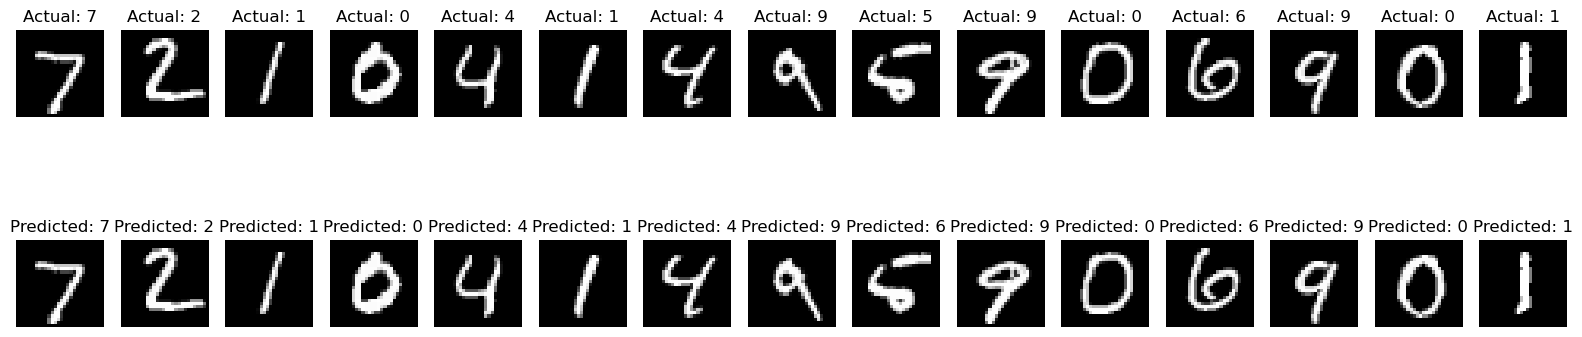

Test loss: 0.254287987947464
Test accuracy: 0.9355999827384949


In [140]:
# Plot predicted vs actual
num_images = 15 # Number of images to display
fig, axs = plt.subplots(2, num_images, figsize=(20, 5))

for i in range(num_images):
    # Show the actual image
    axs[0, i].imshow(x_test[i], cmap='gray')
    axs[0, i].axis('off')
    axs[0, i].set_title(f"Actual: {y_test[i]}")
    
    # Show the predicted image
    axs[1, i].imshow(x_test[i], cmap='gray')
    axs[1, i].axis('off')
    axs[1, i].set_title(f"Predicted: {np.argmax(predictions[i])}")

plt.show()

print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")